In [3]:
#Install Packages
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

In [4]:
data = pd.read_csv('Data.txt')
data.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [5]:
data.shape

(5485, 1)

In [6]:
data.isnull().sum()

5485    0
dtype: int64

In [7]:
def get_label(text):
     for i in text:
            return int(i[0])

In [8]:
data['label'] = data['5485'].apply(lambda x: get_label(x))

In [9]:
data.head()

,5485,label
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [10]:
data.columns = ('text', 'label')

In [11]:
data.head()

,text,label
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [12]:
data['text']=data['text'].str[1:]

In [13]:
data.head()

,text,label
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1
3,am international inc am nd qtr jan oper shr l...,1
4,brown forman inc bfd th qtr net shr one dlr v...,1


In [14]:
data.tail()

,text,label
5480,kelly oil and gas partners kly year dec shr c...,1
5481,japan seeks to strengthen paris currency acco...,8
5482,tcw convertible securities cvt sets dividend ...,1
5483,south korean won fixed at month high the bank...,8
5484,australian unions launch new south wales stri...,4


<AxesSubplot:>

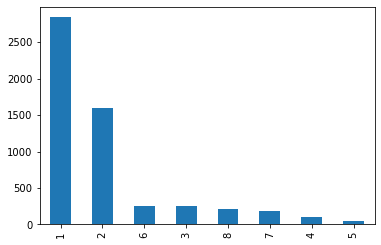

In [15]:
data.label.value_counts().plot(kind='bar')

In [16]:
data['label'].value_counts()

1    2840
2    1596
6     253
3     251
8     206
7     190
4     108
5      41
Name: label, dtype: int64

In [17]:
import nltk
#nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

In [18]:
num1 = ''
num2 = ''
num6 = ''
num3 = ''
num8 = ''
num7 = ''
num4 = ''
num5 = ''

In [19]:
for val in data[data['label'] == '1'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        num1 = num1 + words + ' '
        
for val in data[data['label'] == '2'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        num2 = num2 + words + ' '

for val in data[data['label'] == '6'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        num6 = num6 + words + ' '
        
for val in data[data['label'] == '3'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        num3 = num3 + words + ' '      
        
for val in data[data['label'] == '8'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        num8 = num8 + words + ' '
        
for val in data[data['label'] == '7'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        num7 = num7 + words + ' '

for val in data[data['label'] == '4'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        num4 = num4 + words + ' '
        
for val in data[data['label'] == '5'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        num5 = num5 + words + ' '      

In [20]:
import string
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [21]:
data['text'] = data['text'].apply(text_process)

In [22]:
data.head()

,text,label
0,champion products ch approves stock split cham...,1
1,computer terminal systems cpml completes sale ...,2
2,cobanco inc cbco year net shr cts vs dlrs net ...,1
3,international inc nd qtr jan oper shr loss two...,1
4,brown forman inc bfd th qtr net shr one dlr vs...,1


In [23]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

In [24]:
# Counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  19840


In [25]:
# Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['said', 'mln', 'vs', 'dlrs', 'cts', 'reuter', 'net', 'loss', 'year', 'pct', 'company', 'inc', 'shr', 'profit', 'share', 'corp', 'u', 'billion', 'would', 'shares', 'bank', 'qtr', 'revs', 'stock', 'one', 'oil', 'trade', 'group', 'two', 'also', 'last', 'co', 'sales', 'new', 'april', 'march', 'note', 'quarter', 'per', 'offer', 'first', 'market', 'oper', 'record', 'dividend', 'ltd', 'may', 'dlr', 'earnings', 'tax', 'three', 'th', 'agreement', 'japan', 'common', 'sale', 'exchange', 'international', 'board', 'avg']


In [26]:
# Mapping from words to index

vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i

In [27]:
# Text to Vector
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [28]:
# Convert all titles to vectors
word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for ii, (_, text_) in enumerate(text.iterrows()):
    word_vectors[ii] = text_to_vector(text_[0])

In [30]:
word_vectors.shape

(5485, 19840)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['text'])
vectors.shape

(5485, 19822)

In [32]:
#features = word_vectors
features = vectors

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)

In [35]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4662, 19822)
(823, 19822)
(4662,)
(823,)


In [37]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'reg:linear'
params['eval_metric'] = 'error'
params['eta'] = 0.02
params['max_depth'] = 10

d_train = xgb.DMatrix(X_train, label=y_train)

watchlist = [(d_train, 'train')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[13:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-error:-1.16581
[10]	train-error:-1.16581
[20]	train-error:-1.16581
[30]	train-error:-1.16581
[40]	train-error:-1.16581
[49]	train-error:-1.16581


In [39]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'reg:linear'
params['eval_metric'] = 'error'
params['eta'] = 0.02
params['max_depth'] = 10

d_train = xgb.DMatrix(X_train, label=y_train)

watchlist = [(d_train, 'train')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=400, verbose_eval=10)

[13:44:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-error:-1.16581
[10]	train-error:-1.16581
[20]	train-error:-1.16581
[30]	train-error:-1.16581
[40]	train-error:-1.16581
[50]	train-error:-1.16581
[60]	train-error:-1.16581
[70]	train-error:-1.16581
[80]	train-error:-1.16581
[90]	train-error:-1.16581
[100]	train-error:-1.16581
[110]	train-error:-1.16581
[120]	train-error:-1.16581
[130]	train-error:-1.16581
[140]	train-error:-1.16581
[150]	train-error:-1.16581
[160]	train-error:-1.16581
[170]	train-error:-1.16581
[180]	train-error:-1.16581
[190]	train-error:-1.16581
[200]	train-error:-1.16581
[210]	train-error:-1.16581
[220]	train-error:-1.16581
[230]	train-error:-1.16581
[240]	train-error:-1.16581
[250]	train-error:-1.16581
[260]	train-error:-1.16581
[270]	train-error:-1.16581
[280]	train-error:-1.16581
[290]	train-error:-1.16581
[300]	train-error:-1.165

In [45]:
from sklearn.metrics import accuracy_score

# Predict values for test set
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

# Apply function round() to each element in np array
# so predictions are all either 0 or 1.
npround = np.vectorize(round)
p_test_ints = npround(p_test)

# Error rate for test set
accuracy = accuracy_score(y_test, p_test_ints)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.8408262454434994


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [42]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [43]:
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [46]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

In [48]:
print(pred_scores_word_vectors)

[('SVC', [0.9623329283110571]), ('KN', [0.9003645200486027]), ('NB', [0.9149453219927096]), ('DT', [0.9113001215066828]), ('LR', [0.9416767922235723]), ('RF', [0.9185905224787363])]


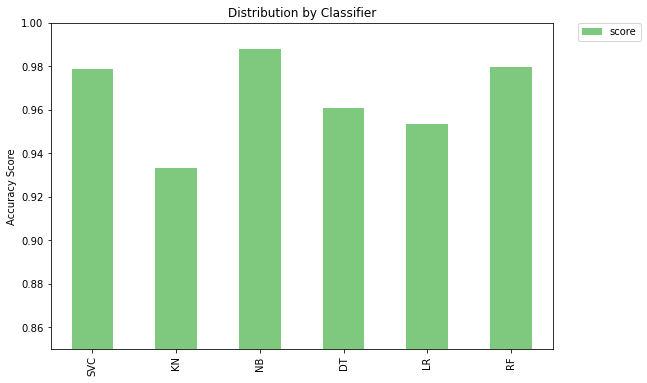

In [51]:
predictions.plot(kind='bar', ylim=(0.85,1.0), figsize=(9,6), align='center', colormap="Accent")
plt.xticks(np.arange(6), predictions.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [53]:
def find(p):
    if p == 1:
        print ("Message is class 1")
    if p == 2:
        print ("Message is class 2")
    if p == 6:
        print ("Message is class 6")
    if p == 3:
        print ("Message is class 3")
    if p == 8:
        print ("Message is class 8")
    if p == 7:
        print ("Message is class 7")
    if p == 4:
        print ("Message is class 4")
    if p == 5:
        print ("Message is class 5")
  

In [71]:
text1 = ["champion products ch approves stock split champion products inc said its board of directors approved a two for one stock split of its common shares for shareholders of record as of april the company also said its board voted to recommend to shareholders at the annual meeting april an increase in the authorized capital stock from five mln to mln shares reuter"]
text2 = ["investment firms cut cyclops cyl stake a group of affiliated new york investment firms said they lowered their stake in cyclops corp to shares or pct of the total outstanding common stock from shares or pct in a filing with the securities and exchange commission the group led by mutual shares corp said it sold cyclops common shares on feb and for mln dlrs reuter"]
text3 = ["brazil anti inflation plan limps to anniversary inflation plan initially hailed at home and abroad as the saviour of the economy is limping towards its first anniversary amid soaring prices widespread shortages and a foreign payments crisis announced last february the plan froze prices fixed the value of the new cruzado currency and ended widespread indexation of the economy in a bid to halt the country s pct inflation rate but within a year the plan has all but collapsed the situation now is worse than it was although there was inflation at least the economy worked a leading bank economist said the crumbling of the plan has been accompanied by a dramatic reversal in the foreign trade account in and brazil s annual trade surpluses had been sufficient to cover the billion dlrs needed to service its billion dlr foreign debt for the first nine months of all seemed to be on target for a repeat with monthly surpluses averaging one billion dlrs but as exports were diverted and imports increased to avoid further domestic shortages the trade surplus plunged to mln dlrs in october and since then has averaged under mln reuter"]
text4 = ["australian unions launch new south wales strikes australian trade unions said they have launched week long strikes and other industrial action in new south wales nsw to protest against new laws that would reduce injury compensation payments union sources said talks with the state government broke down last night but the two sides are scheduled to meet later today in an attempt to find a compromise rail freight and shipping cargo movements in the country s most populous state were the first to be affected and union officials said almost every business sector will be hit unless there is a quick settlement the state government recently introduced a new workers compensation act which would cut the cash benefits to injured workers by up to a third the act is now awaiting parliamentary ratification nsw state premier barrie unsworth has said workers compensation has risen steeply in recent years and the proposed cuts would save hundreds of mlns of dollars a year union officials said industrial action could spread to other states as the federal government also plans to make sharp cuts in workers compensation reuter"]


In [74]:
text = ["champion products ch approves stock split champion products inc said its board of directors approved a two for one stock split of its common shares for shareholders of record as of april the company also said its board voted to recommend to shareholders at the annual meeting april an increase in the authorized capital stock from five mln to mln shares reuter"]
text2 = ["investment firms cut cyclops cyl stake a group of affiliated new york investment firms said they lowered their stake in cyclops corp to shares or pct of the total outstanding common stock from shares or pct in a filing with the securities and exchange commission the group led by mutual shares corp said it sold cyclops common shares on feb and for mln dlrs reuter"]
integers = vectorizer.transform(text3)

In [75]:
p = mnb.predict(integers)[0]
find(p)

Message is class 3


In [58]:
import joblib
joblib.dump(mnb, 'best.pkl')
print ("Best Model (Naive Bayes) Saved")

Best Model (Naive Bayes) Saved


In [59]:
best = joblib.load('best.pkl')

In [60]:
best

MultinomialNB(alpha=0.2)